## Understanding Classification
##### The reference for this code is machine learning book by Aurelion Geron

In [4]:
# We will work on the MNIST digit dataset for underestanding classification tasks.
# let's first load the dataset

from sklearn.datasets import load_digits
mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
# let's load our features and target separately
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((1797, 64), (1797,))

(-0.5, 7.5, 7.5, -0.5)

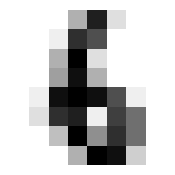

In [16]:
# this is the smaller version of the MNIST dataset, each image is of size 8*8
# we will visualise a sample image now
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[34]
some_digit_image = some_digit.reshape(8, 8)

fig, ax = plt.subplots(figsize=(2, 4))

ax.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = 'nearest')
ax.axis('off')
#ax.show()

In [18]:
# lets check the label for the above image which looks like a 6
y[34]

6

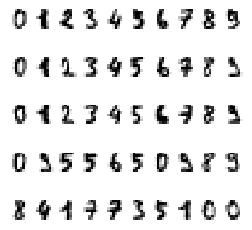

In [20]:
# yes indeed it was 6. Lets plot few image together to see the complexity of the dataset
num_rows, num_columns = 5,10
fig, axes = plt.subplots(num_rows, num_columns, figsize=(3,3))
axes = axes.flatten()
for i in range(num_rows*num_columns):
    axes[i].imshow(X[i].reshape(8, 8), cmap = mpl.cm.binary, interpolation = 'nearest')
    axes[i].axis('off')

In [40]:
# Let's now do a train test split 
X_train, X_test, y_train, y_test = X[:1400], X[1400:], y[:1400], y[1400:]

### Training a Binary Classifier

In [41]:
# we will first train the classifier to predict only the number 6
y_train_6 = (y_train == 6)
y_test_6 = (y_test == 6)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_6)

SGDClassifier(random_state=42)

In [51]:
y[33]

5

In [50]:
# now check if it can predict for a test digit correctly
sgd_clf.predict([X[33]])

array([False])

### Performace metrics

In [43]:
# let's first use cross validation and check the scores
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_6, cv=3, scoring='accuracy')

array([0.99357602, 0.97858672, 0.98283262])

In [44]:
# way to high accuracy
# now lets check how much a dumb classifier which classifies every non 6 classes accurate
import numpy as np
from sklearn.base import BaseEstimator
class Never6Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        return np.zeros((len(x), 1), dtype=bool)
    
never_6_clf = Never6Classifier()
cross_val_score(never_6_clf, X_train, y_train_6, cv = 3, scoring = 'accuracy')

array([0.90149893, 0.8993576 , 0.89484979])

In [45]:
# a very high accuracy indeed! It is because 90% of the time the images are not 6. So accuracy is not a good measure we need some thing else
# there is something called confusion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_6, cv = 3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_6, y_train_pred)

array([[1245,   13],
       [   8,  134]])

In [46]:
# TN, FP
# FN, TP
# a perfect prediction would be zero False Positive and False negatives
y_train_perfect_pred = y_train_6
confusion_matrix(y_train_6, y_train_perfect_pred)

array([[1258,    0],
       [   0,  142]])

In [47]:
# precision = TP/(TP+FP)
# recall = TP/(TP+FN)
# precision will give us information about false positives and recall will help us understand how many of the actual class is actually predicted correctly
from sklearn.metrics import precision_score, recall_score
print('Precision score',precision_score(y_train_6, y_train_pred))
print('Recall Score',recall_score(y_train_6, y_train_pred))

Precision score 0.9115646258503401
Recall Score 0.9436619718309859


In [48]:
# f1 score = 2*precision*recall/(precision+recall)
from sklearn.metrics import f1_score
print("F1 score:", f1_score(y_train_6, y_train_pred))

F1 score: 0.9273356401384083
